- As I look for the most capable classification algorithm, models like randomForests, SVM and gradient
boosted algorithms like XGBoost will be tested to find one which gives the highest accuracy(95% >).

- Ensemble techniques like bagging and pasting, voting classification & adaptive boost will also be tested
- Models will be evaluated using metrics like the confusion matrix, and accuracy 
- The most capable model will be selected and fine-tuned for improved performance

### IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

### SPLITTING THE DATASETS

In [2]:
train_data = pd.read_csv('../datasets/mnist_train.csv')
test_data = pd.read_csv('../datasets/mnist_test.csv')

X_train, y_train = train_data.iloc[:, 1:].values, train_data.iloc[:, 0].values
X_test, y_test = test_data.iloc[:, 1:].values, test_data.iloc[:, 0].values 

# TRAINING & EVALUATING CLASSIFICATION ALGORITHMS

- ### IMPORTING CLASSIFICATION ALGORITHMS

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

forestClassifier = RandomForestClassifier() # The Random Forests Classifier  
vectorClassifier = SVC(kernel='rbf') # A Support Vector Machine with rbf kernel
xgb = XGBClassifier() # An XGBoost classifier

# A list of models
raw_models = [forestClassifier, vectorClassifier, xgb]

- ### MODEL TRAINING FUNCTION
Takes a list of models & the training dataset, trains and returns a list of trained models

In [4]:
def trainer(model_list, X_train_, y_train_):
    _trained_models = []
    for model in model_list:
        _trained_models.append(model.fit(X_train_, y_train_))
    
    return _trained_models


trained_models = trainer(raw_models, X_train, y_train)

- ### MODEL PREDICTION AND EVALUATION ON TEST DATA
A class that takes a list of trained models, make predictions on the test data and evaluates their peformance

In [5]:
from sklearn.metrics import accuracy_score

class model_eval:
    def __init__(self, X_test_, y_test_, trained_models_):
        self.X_test_ = X_test_
        self.y_test_ = y_test_
        self.trained_models_ = trained_models_
        self.metrics = []
        
    
    def model_predict(self):
        for model in self.trained_models_:
            self.metrics.append({model: f"Accuracy {accuracy_score(model.predict(self.X_test_), self.y_test_)}"})
    def display_metrics(self): 
        return self.metrics     

In [6]:
model_eval = model_eval(X_test, y_test, trained_models)

In [7]:
model_eval.model_predict()

In [8]:
model_eval.display_metrics()

[{RandomForestClassifier(): 'Accuracy 0.9696'},
 {SVC(): 'Accuracy 0.9792'},
 {XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob', ...): 'Accuracy 0.9795'}]

- Support Vector Classifier: 0.9792 accuracy
- RandomForestClassifier: 0.9698 accuracy
- XGBClassifier: 0.9795 accuracy

# USING ENSEMBLE METHODS

- ### VOTING CLASSIFIER
Combining SVC, RandomForestClassifiers and XGBoostClassifier to make an ensemble

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# SOFT VOTING CLASSIFIER: Aggregates the probabilities of different classifiers
# An SVC's probability hyperparameter set to True, because it doesn't predict probabilities out of the box
classifier = VotingClassifier(estimators=[
    ('xgboost', XGBClassifier()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier())
], voting='soft', n_jobs=-1)

classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 n_jobs=-1, voting='soft')

In [10]:
# Evaluation of the soft-voting classifier's performance basing on its accuracy
from sklearn.metrics import accuracy_score

classifier_preds = classifier.predict(X_test)
print(f"ACCURACY: {accuracy_score(classifier_preds, y_test)*100} %")

ACCURACY: 98.04 %


In [11]:
# HARD VOTING CLASSIFIER: Gets the majority vote from different classifiers and
# makes it the classifier's final prediction
hard_classifier = VotingClassifier(estimators=[
    ('xgboost', XGBClassifier()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier())
], voting='hard', n_jobs=-1)
hard_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 n_jobs=-1)

In [12]:
# Evaluation of the hard-voting classifier's performance basing on its accuracy
from sklearn.metrics import accuracy_score

hardclassifier_preds = hard_classifier.predict(X_test)
print(f"ACCURACY: {accuracy_score(hardclassifier_preds, y_test)*100} %")

ACCURACY: 97.91 %


- ### BAGGING AND PASTING
Using RandomForest Classifier

In [13]:
# BAGGING
# For a Bagging classifier, sampling of instances to train models is done WITH replacement
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

bagging_classifier = BaggingClassifier(
    RandomForestClassifier(),
    n_estimators=500,
    max_samples=100, n_jobs=-1
)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [14]:
# Evaluation of bagging classifier's performance basing on its accuracy
from sklearn.metrics import accuracy_score

baggingclf_pred = bagging_classifier.predict(X_test)
print(f"ACCURACY: {accuracy_score(baggingclf_pred, y_test)*100} %")

ACCURACY: 84.92 %


In [16]:
#PASTING
# For a pasting classifier, sampling of instances to train models is done WITHOUT replacement
# To enable pasting, the bootstrap hyperparameter is set to false
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

pasting_classifier = BaggingClassifier(
    RandomForestClassifier(),
    n_estimators=500,
    bootstrap=False, # Enabling pasting
    max_samples=100, n_jobs=-1
)
pasting_classifier.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, estimator=RandomForestClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [17]:
# Evaluation of pasting classifier's performance basing on its accuracy
from sklearn.metrics import accuracy_score

pastingclf_pred = pasting_classifier.predict(X_test)
print(f"ACCURACY: {accuracy_score(pastingclf_pred, y_test)*100} %")

ACCURACY: 84.69 %


- ### ADAPTIVE BOOST

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), # A stamp
    n_estimators = 500, learning_rate=0.5
)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=500)

In [19]:
# Evaluation of adaboost's performance basing on its accuracy
from sklearn.metrics import accuracy_score

ada_pred = ada_classifier.predict(X_test)
print(f"ACCURACY: {accuracy_score(ada_pred, y_test)*100} %")

ACCURACY: 75.36 %


## The soft voting classifier has produced the best accuracy of 98.0099% with all its 3 models at default hyperparameters(without fine-tuning)

# CROSS-VALIDATING THE SOFT-VOTING CLASSIFIER

In [20]:
from sklearn.model_selection import cross_val_score

# The Soft-Voting Classifier
classifier_1 = VotingClassifier(estimators=[
    ('xgboost', XGBClassifier()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier())
], voting='soft', n_jobs=-1)

# Cross-Validation with 3 folds
scores = cross_val_score(classifier_1, X_train, y_train,
                         cv=3, scoring='accuracy', n_jobs=-1)

In [21]:
# Display cross-validation scores
scores

array([0.978  , 0.97395, 0.9766 ])

# CONFUSION MATRIX OF THE SOFT-VOTING CLASSIFIER


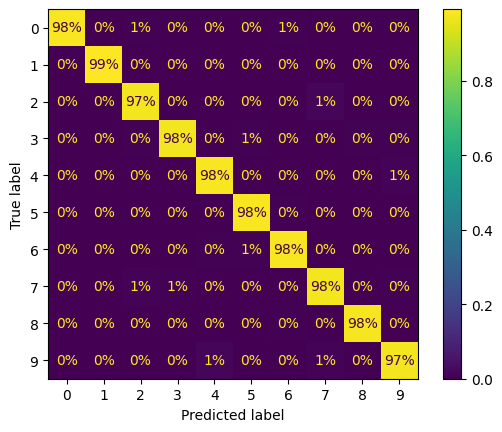

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(classifier_preds, y_test, normalize="true", values_format=".0%")